In [18]:
import pandas as pd
import numpy as np

In [19]:
# 读取txt，分隔符为\t
df1 = pd.read_csv("D:\Data\CollegeJobCommit\大三下\数据分析课程设计\实验 1 数据预处理和探索性分析\ReportCard1.txt",
                  delimiter='\t')
df2 = pd.read_csv("D:\Data\CollegeJobCommit\大三下\数据分析课程设计\实验 1 数据预处理和探索性分析\ReportCard2.txt",
                  delimiter='\t')

# 打印前5行
print(df1[:5])
print()
print(df2[:5])

      xh  sex  poli   chi  math
0  92103  2.0   NaN   NaN   NaN
1  92239  2.0  40.0  63.0  44.0
2  92142  2.0   NaN  70.0  59.0
3  92223  1.0  56.0  91.0  65.5
4  92144  1.0  59.0  79.0  34.0

      xh  fore   phy   che   geo   his
0  92146  20.0  49.0  32.0  32.0  51.0
1  92239  21.0  54.0  26.0  26.0  55.0
2  92142  22.0  68.0  26.0  26.0  63.0
3  92141  28.0  69.0  43.0  43.0  74.0
4  92236  28.0  63.0  36.0  36.0  52.0


In [20]:
# 1)将两个数据文件按学号合并为一个数据文件，得到包含所有课程成绩的数据文件。
merge_df = df1.merge(df2, how='inner', on='xh')
print(merge_df)
merge_df.to_csv("D:\Data\CollegeJobCommit\大三下\数据分析课程设计\实验 1 数据预处理和探索性分析\ReportCard_Merge.txt")

       xh  sex  poli   chi  math  fore   phy   che   geo   his
0   92103  2.0   NaN   NaN   NaN  66.0  98.0  79.0  89.0  81.0
1   92239  2.0  40.0  63.0  44.0  21.0  54.0  26.0  26.0  55.0
2   92142  2.0   NaN  70.0  59.0  22.0  68.0  26.0  26.0  63.0
3   92223  1.0  56.0  91.0  65.5  68.0  77.0  39.0  54.5  63.0
4   92144  1.0  59.0  79.0  34.0  34.0  57.0  37.0  37.0  76.0
5   92217  2.0  60.0  82.5  76.5  35.0  81.0  60.0  70.5  74.0
6   92111  1.0  61.0  86.0  74.0  51.0  74.0  61.0  76.0  91.0
7   92146  1.0  61.0  69.0  45.0  20.0  49.0  32.0  32.0  51.0
8   92234  1.0  66.0  79.0  55.5  57.0  52.0  57.0  41.0  65.0
9   92113  1.0  70.0  85.0  66.0  63.0  86.0  65.0  64.0  84.0
10  92126  1.0  70.0  92.0  56.0  40.0  66.0  56.0  70.5  91.0
11  92211  2.0  71.0  73.0  69.0  42.0  95.0  61.0  76.5  76.0
12  92226  1.0  73.0  77.0  52.5  39.0  81.0  44.0  78.0  73.0
13  92141  2.0  73.0  82.0  41.5  28.0  69.0  43.0  43.0  74.0
14  92203  2.0  74.0  93.0  84.5  50.0  89.0  72.0  82.

In [21]:
# 位选择：iloc[行,列] axis： 0 列操作 1 行操作
merge_df['总成绩'] = None
merge_df['平均成绩'] = None

merge_df['总成绩'] =merge_df.iloc[:, 2:-2].sum(axis=1)
merge_df['平均成绩'] =merge_df.iloc[:, 2:-2].mean(axis=1)
print(merge_df.to_string())

       xh  sex  poli   chi  math  fore   phy   che   geo   his    总成绩       平均成绩
0   92103  2.0   NaN   NaN   NaN  66.0  98.0  79.0  89.0  81.0  413.0  82.600000
1   92239  2.0  40.0  63.0  44.0  21.0  54.0  26.0  26.0  55.0  329.0  41.125000
2   92142  2.0   NaN  70.0  59.0  22.0  68.0  26.0  26.0  63.0  334.0  47.714286
3   92223  1.0  56.0  91.0  65.5  68.0  77.0  39.0  54.5  63.0  514.0  64.250000
4   92144  1.0  59.0  79.0  34.0  34.0  57.0  37.0  37.0  76.0  413.0  51.625000
5   92217  2.0  60.0  82.5  76.5  35.0  81.0  60.0  70.5  74.0  539.5  67.437500
6   92111  1.0  61.0  86.0  74.0  51.0  74.0  61.0  76.0  91.0  574.0  71.750000
7   92146  1.0  61.0  69.0  45.0  20.0  49.0  32.0  32.0  51.0  359.0  44.875000
8   92234  1.0  66.0  79.0  55.5  57.0  52.0  57.0  41.0  65.0  472.5  59.062500
9   92113  1.0  70.0  85.0  66.0  63.0  86.0  65.0  64.0  84.0  583.0  72.875000
10  92126  1.0  70.0  92.0  56.0  40.0  66.0  56.0  70.5  91.0  541.5  67.687500
11  92211  2.0  71.0  73.0  

In [22]:
sort_df = merge_df.sort_values('总成绩',ascending=False)
print(sort_df.to_string())

       xh  sex  poli   chi  math  fore   phy   che   geo   his    总成绩       平均成绩
59  92101  2.0  96.0  96.0  87.5  72.0  93.0  65.0  76.0  92.0  677.5  84.687500
22  92202  1.0  78.0  89.0  83.5  81.0  91.0  77.0  81.0  93.0  673.5  84.187500
58  92102  1.0  94.0  97.0  86.5  61.0  93.0  64.0  79.5  95.0  670.0  83.750000
51  92104  2.0  89.0  97.0  69.5  86.0  83.0  62.0  83.0  94.0  663.5  82.937500
14  92203  2.0  74.0  93.0  84.5  50.0  89.0  72.0  82.5  92.0  637.0  79.625000
47  92204  2.0  88.0  81.0  87.5  60.0  84.0  63.0  79.0  92.0  634.5  79.312500
48  92106  2.0  88.0  88.0  78.0  60.0  90.0  70.0  81.5  77.0  632.5  79.062500
57  92110  1.0  92.0  94.0  71.0  65.0  78.0  62.0  83.0  87.0  632.0  79.000000
26  92205  2.0  81.0  79.0  84.0  60.0  91.0  64.0  81.0  92.0  632.0  79.000000
29  92105  1.0  82.0  85.0  79.5  60.0  88.0  66.0  72.5  98.0  631.0  78.875000
38  92108  2.0  84.0  90.0  69.5  50.0  80.0  60.0  86.5  94.0  614.0  76.750000
27  92112  2.0  81.0  75.5  

In [23]:
groupBySex_mean_df = merge_df.groupby('sex').apply(lambda x:x.iloc[:,2:-2].mean())
print(groupBySex_mean_df.to_string())

          poli        chi       math       fore        phy        che        geo        his
sex                                                                                        
1.0  78.866667  83.500000  60.033333  51.200000  72.733333  52.366667  62.533333  78.933333
2.0  80.464286  83.051724  62.344828  48.633333  77.666667  55.800000  67.950000  78.433333


In [24]:
# 自定义分组标签和边界值
labels = ['不及格', '及格', '中', '良', '优']
bins = [0, 59, 69, 79, 89, 100]

# 按照分组标签对平均成绩进行分类
merge_df['等级'] = pd.cut(merge_df['平均成绩'], bins=bins, labels=labels)

print(merge_df.to_markdown())

|    |    xh |   sex |   poli |   chi |   math |   fore |   phy |   che |   geo |   his |   总成绩 |   平均成绩 | 等级   |
|---:|------:|------:|-------:|------:|-------:|-------:|------:|------:|------:|------:|---------:|-----------:|:-------|
|  0 | 92103 |     2 |    nan | nan   |  nan   |     66 |    98 |    79 |  89   |    81 |    413   |    82.6    | 良     |
|  1 | 92239 |     2 |     40 |  63   |   44   |     21 |    54 |    26 |  26   |    55 |    329   |    41.125  | 不及格 |
|  2 | 92142 |     2 |    nan |  70   |   59   |     22 |    68 |    26 |  26   |    63 |    334   |    47.7143 | 不及格 |
|  3 | 92223 |     1 |     56 |  91   |   65.5 |     68 |    77 |    39 |  54.5 |    63 |    514   |    64.25   | 及格   |
|  4 | 92144 |     1 |     59 |  79   |   34   |     34 |    57 |    37 |  37   |    76 |    413   |    51.625  | 不及格 |
|  5 | 92217 |     2 |     60 |  82.5 |   76.5 |     35 |    81 |    60 |  70.5 |    74 |    539.5 |    67.4375 | 及格   |
|  6 | 92111 |     1 |     61 |  86   |

In [25]:
groupBySex_count_df = merge_df.groupby(['sex','等级']).apply(lambda x:x.等级.count()).unstack()
print(groupBySex_count_df.to_markdown())

|   sex |   不及格 |   及格 |   中 |   良 |
|------:|---------:|-------:|-----:|-----:|
|     1 |        4 |     12 |   12 |    2 |
|     2 |        4 |      9 |   11 |    6 |


C:\Users\27116\AppData\Local\Temp\ipykernel_19664\2277753829.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupBySex_count_df = merge_df.groupby(['sex','等级']).apply(lambda x:x.等级.count()).unstack()


In [30]:
# 生成性别的虚拟自变量
# gender_dummy = pd.get_dummies(merge_df['sex'], prefix='sex')
# # 将虚拟变量与原始数据合并
# dummy_df = pd.concat([merge_df, gender_dummy], axis=1)

dummy_df = merge_df.join(pd.get_dummies(merge_df['sex']))
print("生成性别的虚拟自变量:")
print(dummy_df.to_string())

生成性别的虚拟自变量:
       xh  sex  poli   chi  math  fore   phy   che   geo   his    总成绩       平均成绩   等级    1.0    2.0
0   92103  2.0   NaN   NaN   NaN  66.0  98.0  79.0  89.0  81.0  413.0  82.600000    良  False   True
1   92239  2.0  40.0  63.0  44.0  21.0  54.0  26.0  26.0  55.0  329.0  41.125000  不及格  False   True
2   92142  2.0   NaN  70.0  59.0  22.0  68.0  26.0  26.0  63.0  334.0  47.714286  不及格  False   True
3   92223  1.0  56.0  91.0  65.5  68.0  77.0  39.0  54.5  63.0  514.0  64.250000   及格   True  False
4   92144  1.0  59.0  79.0  34.0  34.0  57.0  37.0  37.0  76.0  413.0  51.625000  不及格   True  False
5   92217  2.0  60.0  82.5  76.5  35.0  81.0  60.0  70.5  74.0  539.5  67.437500   及格  False   True
6   92111  1.0  61.0  86.0  74.0  51.0  74.0  61.0  76.0  91.0  574.0  71.750000    中   True  False
7   92146  1.0  61.0  69.0  45.0  20.0  49.0  32.0  32.0  51.0  359.0  44.875000  不及格   True  False
8   92234  1.0  66.0  79.0  55.5  57.0  52.0  57.0  41.0  65.0  472.5  59.062500   及格   

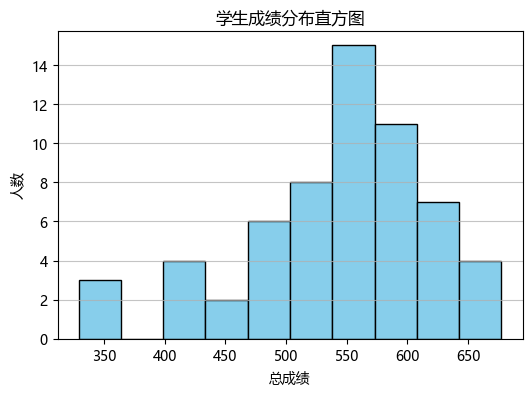

In [27]:
import matplotlib.pyplot as plt
# 显示中文
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体：解决plot不能显示中文问题
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

# 创建直方图
plt.figure(figsize=(6, 4))
plt.hist(merge_df['总成绩'], bins=10, color='skyblue', edgecolor='black')  # 设置直方图的颜色和边界颜色
plt.xlabel('总成绩')  # x 轴标签
plt.ylabel('人数')  # y 轴标签
plt.title('学生成绩分布直方图')  # 图表标题
plt.grid(axis='y', alpha=0.75)  # 添加网格线
plt.show()


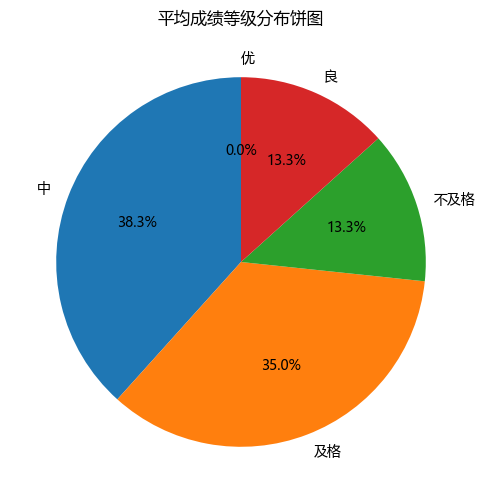

In [28]:
# 计算每个等级的人数
grade_counts = merge_df['等级'].value_counts()
# 创建饼图
plt.figure(figsize=(8, 6))
plt.pie(grade_counts, labels=grade_counts.index , autopct='%1.1f%%', startangle=90)
plt.title('平均成绩等级分布饼图')

plt.show()

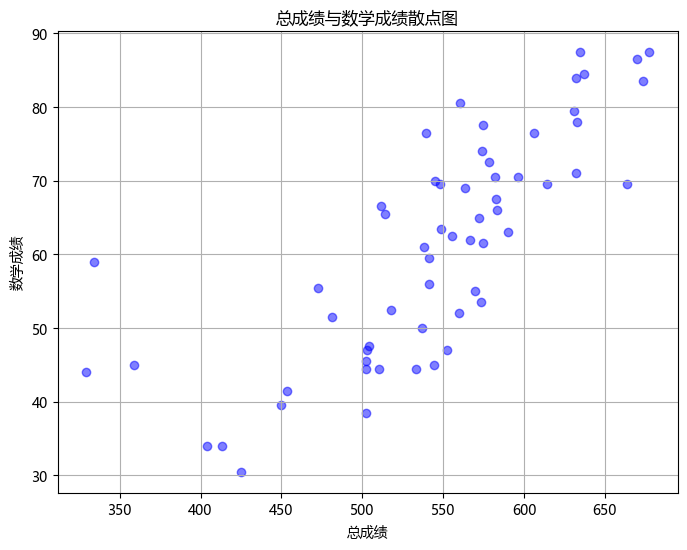

In [29]:
# 创建散点图
plt.figure(figsize=(8, 6))
# 设置散点颜色为蓝色，透明度为0.5
plt.scatter(merge_df['总成绩'], merge_df['math'], color='blue', alpha=0.5)  

plt.title('总成绩与数学成绩散点图')
plt.xlabel('总成绩')
plt.ylabel('数学成绩')
plt.grid(True)  # 显示网格线
plt.show()
